# ***회귀란?***

> 클래스 중 하나로 분류하는 것이 아니라 임의의 어떤 숫자를 예측하는 문제



K-최근접 이웃 회귀는 샘플에 가장 가까운 샘플 k를 선택 한 후, 이 수치들의 평균을 구하는 방식으로 회귀를 구현한다.

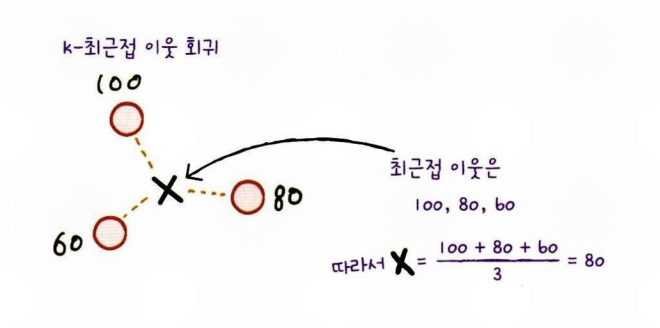

In [2]:

import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

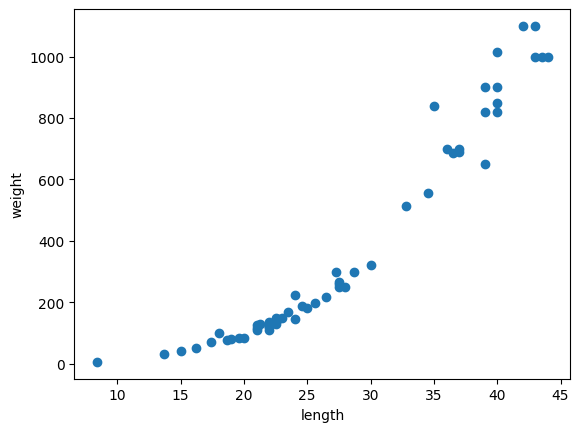

In [3]:
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [12]:
# 농어 데이터를 훈련 세트와 테스트 세트로 나누기
from sklearn.model_selection import train_test_split
# perch_length를 train_input과 test_input으로 나누고 perch_weight를 train_target, test_target으로 분할
train_input, test_input, train_target, test_target = train_test_split(perch_length,perch_weight, random_state=42)

사이킷런에 사용할 훈련 세트는 2차원 배열이여야 한다.

(n_samples, n_features)

이번 예제에서는 특성을 한 가지만 사용하기 때문에 수동으로 2차원 배열을 만들어야한다.

numpy에서는 **reshape()** 메서드를 통해 배열의 차원을 쉽게 바꿀 수 있다.



```
test_array = np.array([1,2,3,4])
print(test_array.shape)

test_array = np.shape(2,2)
print(test_array.shape)
```



In [14]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)
print(train_input)

(42, 1) (14, 1)
[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]
 [25. ]
 [40. ]
 [39. ]
 [43. ]
 [22. ]
 [20. ]
 [22. ]
 [24. ]
 [27.5]
 [43. ]
 [40. ]
 [24. ]
 [21. ]
 [27.5]
 [40. ]
 [32.8]
 [26.5]
 [36.5]
 [13.7]
 [22.7]
 [15. ]
 [37. ]
 [35. ]
 [28.7]
 [23.5]
 [39. ]
 [21. ]
 [23. ]
 [22. ]
 [44. ]
 [22.5]
 [19. ]
 [37. ]
 [22. ]
 [25.6]
 [42. ]
 [34.5]]


In [15]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

# k-최근접 이웃 회귀 모델 훈련
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [16]:
# 테스트 세트로 모델 성능 평가
print(knr.score(test_input, test_target))

0.992809406101064


회귀 알고리즘의 score 점수는 **결정계수(R)** 이다.


결정 계수는 1 - {(타깃 - 예측)^2 의 합 / (타깃 - 평균))^2 의 합} 으로 계산된다.

In [17]:
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측 생성
test_prediction = knr.predict(test_input)
# mean_absolute_error : 타깃과 예측의 절댓값 오차를 평균하여 반환
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


In [18]:
# 테스트 세트가 아닌 훈련 세트로 모델 성능 평가
print(knr.score(train_input, train_target))

0.9698823289099254


**과대적합**

훈련 세트의 점수 >> 테스트 세트의 점수
-> 훈련 세트에만 잘 맞는 모델

**과소적합**

훈련 세트의 점수 << 테스트 세트의 점수
-> 모델이 너무 단순하여 훈련 세트에 적절히 훈련되지 않은 경우

-> 데이터가 너무 작아서 훈련 세트의 특징을 담지 못한 경우



---



현재 실습 중인 농어 문제는 과소적합 문제 발생

--> 모델을 더 복잡하게 만들면 된다.

--> How? k의 개수를 줄여 더 국지적으로 무게를 예측하도록 변경

In [20]:
# 이웃의 개수를 5에서 3으로 변경
knr.n_neighbors = 3

knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9804899950518966
0.9746459963987609
